Guardando animación como '001_66.mp4'...
¡Animación guardada con éxito!


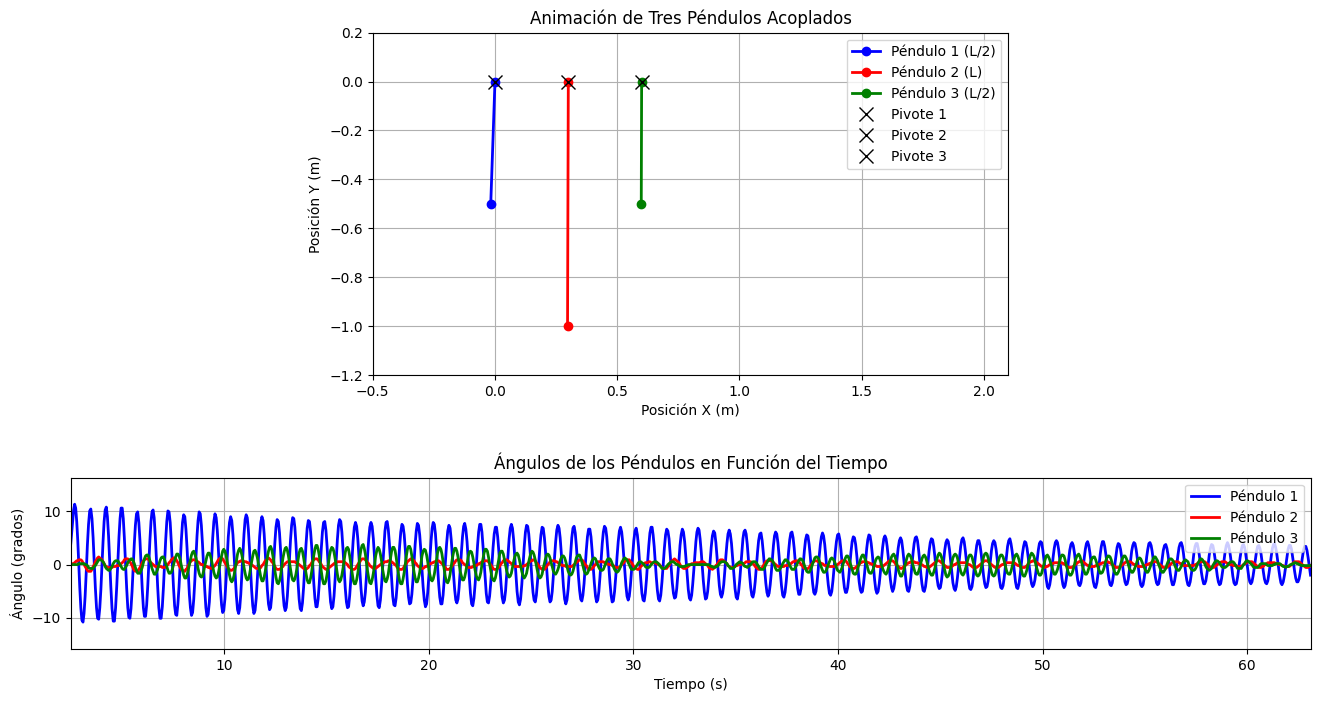

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os # Necesario para manipular rutas de archivos

# --- PARÁMETROS CONFIGURABLES ---
# Longitud del péndulo central (en metros)
L = 1.0  # Puedes cambiar este valor
# Distancia entre los ejes de giro (en metros)
a = 0.3  # Puedes cambiar este valor
# --- FIN PARÁMETROS CONFIGURABLES ---

# Longitudes de los péndulos laterales
L1 = L / 2
L3 = L / 2

# Nombre del archivo de datos
file_name = '001_66_filtrado.tsv' # Asegúrate de que este archivo esté en la misma carpeta

# Cargar los datos desde el archivo .tsv
try:
    df = pd.read_csv(file_name, sep='\t')
except FileNotFoundError:
    print(f"Error: El archivo '{file_name}' no se encontró. Asegúrate de que esté en la misma carpeta que el script.")
    exit()

# Crear una copia del DataFrame para la gráfica de ángulos en grados, ya que los datos originales están en grados
df_angles_deg = df.copy()

# Convertir los ángulos del DataFrame principal de grados a radianes para los cálculos de la animación de péndulos
df.iloc[:, 1:] = np.deg2rad(df.iloc[:, 1:])


# Puntos de pivote de los péndulos
pivot1 = (0, 0)
pivot2 = (a, 0)
pivot3 = (2 * a, 0)

# Configuración de la figura y los ejes para la animación
# Dos subplots: uno para los péndulos y otro para las gráficas de ángulos
fig, (ax_pendulum, ax_angles) = plt.subplots(
    2, 1, figsize=(16, 8), gridspec_kw={'height_ratios': [2, 1]}
)
# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.4)

# --- Configuración del Subplot de Péndulos ---
ax_pendulum.set_xlim(-0.5, 2 * a + L + 0.5) # Ajusta los límites X para que quepan todos los péndulos
ax_pendulum.set_ylim(-L - 0.2, 0.2) # Ajusta los límites Y (hacia abajo, ya que los péndulos cuelgan)
ax_pendulum.set_aspect('equal')
ax_pendulum.grid(True)
ax_pendulum.set_xlabel('Posición X (m)')
ax_pendulum.set_ylabel('Posición Y (m)')
ax_pendulum.set_title('Animación de Tres Péndulos Acoplados')

line1, = ax_pendulum.plot([], [], 'o-', lw=2, color='blue', label='Péndulo 1 (L/2)')
line2, = ax_pendulum.plot([], [], 'o-', lw=2, color='red', label='Péndulo 2 (L)')
line3, = ax_pendulum.plot([], [], 'o-', lw=2, color='green', label='Péndulo 3 (L/2)')

ax_pendulum.plot(*pivot1, 'kx', markersize=10, label='Pivote 1')
ax_pendulum.plot(*pivot2, 'kx', markersize=10, label='Pivote 2')
ax_pendulum.plot(*pivot3, 'kx', markersize=10, label='Pivote 3')

ax_pendulum.legend(loc='upper right')

# --- Configuración del Subplot de Gráficas de Ángulos ---
ax_angles.set_xlabel('Tiempo (s)')
ax_angles.set_ylabel('Ángulo (grados)') # Se muestra en grados para que coincida con los datos de entrada
ax_angles.set_title('Ángulos de los Péndulos en Función del Tiempo')
ax_angles.grid(True)

# Establecer los límites X e Y para la gráfica de ángulos
ax_angles.set_xlim(df_angles_deg.iloc[:, 0].min(), df_angles_deg.iloc[:, 0].max())
ax_angles.set_ylim(df_angles_deg.iloc[:, 1:].min().min() - 5, df_angles_deg.iloc[:, 1:].max().max() + 5)


# Obtener los datos completos para las funciones de tiempo (ángulos)
time_data = df_angles_deg.iloc[:, 0]
angle1_data = df_angles_deg.iloc[:, 1]
angle2_data = df_angles_deg.iloc[:, 2]
angle3_data = df_angles_deg.iloc[:, 3]

# Inicializar las líneas que se irán "dibujando"
drawing_line1, = ax_angles.plot([], [], color='blue', linestyle='-', lw=2, label='Péndulo 1')
drawing_line2, = ax_angles.plot([], [], color='red', linestyle='-', lw=2, label='Péndulo 2')
drawing_line3, = ax_angles.plot([], [], color='green', linestyle='-', lw=2, label='Péndulo 3')
ax_angles.legend(loc='upper right') # Asegurarse de que la leyenda se dibuje


# Función de inicialización de la animación
def init():
    # Inicializar las líneas de los péndulos
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    # Inicializar las líneas de dibujo de las funciones de ángulo
    drawing_line1.set_data([], [])
    drawing_line2.set_data([], [])
    drawing_line3.set_data([], [])
    return line1, line2, line3, drawing_line1, drawing_line2, drawing_line3

# Función de actualización para cada fotograma de la animación
def animate(i):
    # --- Actualizar péndulos ---
    # Obtener ángulos en radianes para la animación física
    angle1_rad = df.iloc[i, 1]
    angle2_rad = df.iloc[i, 2]
    angle3_rad = df.iloc[i, 3]

    x1_bob = pivot1[0] + L1 * np.sin(angle1_rad)
    y1_bob = pivot1[1] - L1 * np.cos(angle1_rad)
    line1.set_data([pivot1[0], x1_bob], [pivot1[1], y1_bob])

    x2_bob = pivot2[0] + L * np.sin(angle2_rad)
    y2_bob = pivot2[1] - L * np.cos(angle2_rad)
    line2.set_data([pivot2[0], x2_bob], [pivot2[1], y2_bob])

    x3_bob = pivot3[0] + L3 * np.sin(angle3_rad)
    y3_bob = pivot3[1] - L3 * np.cos(angle3_rad)
    line3.set_data([pivot3[0], x3_bob], [pivot3[1], y3_bob])

    # --- Dibujar progresivamente las funciones de ángulo ---
    # Se actualizan las líneas hasta el punto actual (i)
    drawing_line1.set_data(time_data[:i+1], angle1_data[:i+1])
    drawing_line2.set_data(time_data[:i+1], angle2_data[:i+1])
    drawing_line3.set_data(time_data[:i+1], angle3_data[:i+1])

    return line1, line2, line3, drawing_line1, drawing_line2, drawing_line3

# Crear la animación
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(df), interval=50, blit=True
)

# --- Nomenclatura para el archivo de salida ---
# Extraer el nombre base del archivo (sin extensión)
base_name = os.path.splitext(file_name)[0] # e.g., '001_16_filtrado'

# Dividir el nombre base por '_' y tomar las primeras dos partes
# Esto asume que el formato es siempre 'XXX_YY_...'
parts = base_name.split('_')
if len(parts) >= 2:
    output_prefix = f"{parts[0]}_{parts[1]}"
else:
    # Si el nombre del archivo no coincide con el formato esperado, usa un nombre por defecto
    output_prefix = "pendulos_acoplados_con_grafica"

output_video_name = f"{output_prefix}.mp4"

# Guardar la animación como un archivo MP4
print(f"Guardando animación como '{output_video_name}'...")
ani.save(output_video_name, writer='ffmpeg', fps=20)
print("¡Animación guardada con éxito!")

# Mostrar la animación
plt.show()

Guardando animación como '001_16.mp4'...
¡Animación guardada con éxito!


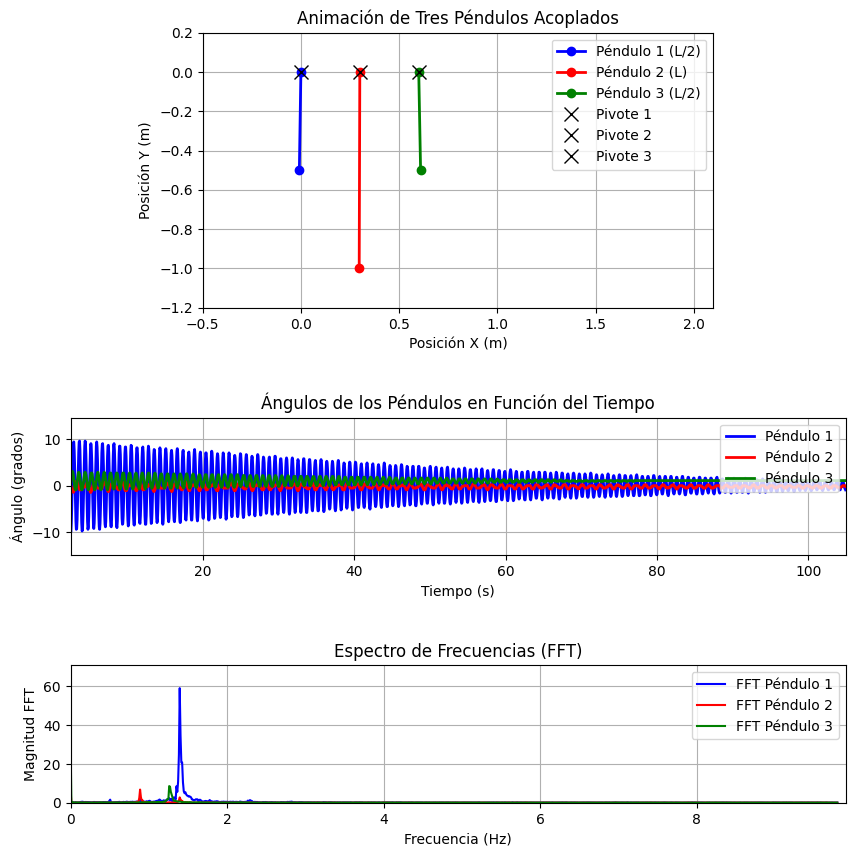

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os # Necesario para manipular rutas de archivos

# --- PARÁMETROS CONFIGURABLES ---
# Longitud del péndulo central (en metros)
L = 1.0  # Puedes cambiar este valor
# Distancia entre los ejes de giro (en metros)
a = 0.3  # Puedes cambiar este valor
# --- FIN PARÁMETROS CONFIGURABLES ---

# Longitudes de los péndulos laterales
L1 = L / 2
L3 = L / 2

# Nombre del archivo de datos
file_name = '001_16_filtrado.tsv' # Asegúrate de que este archivo esté en la misma carpeta

# Cargar los datos desde el archivo .tsv
try:
    df = pd.read_csv(file_name, sep='\t')
except FileNotFoundError:
    print(f"Error: El archivo '{file_name}' no se encontró. Asegúrate de que esté en la misma carpeta que el script.")
    exit()

# Crear una copia del DataFrame para la gráfica de ángulos en grados, ya que los datos originales están en grados
df_angles_deg = df.copy()

# Convertir los ángulos del DataFrame principal de grados a radianes para los cálculos de la animación de péndulos
df.iloc[:, 1:] = np.deg2rad(df.iloc[:, 1:])

# --- Cálculo de la tasa de muestreo para FFT ---
time_data = df.iloc[:, 0]
# Asegúrate de que haya al menos dos puntos para calcular dt
if len(time_data) > 1:
    dt = time_data.iloc[1] - time_data.iloc[0]
    sampling_rate = 1 / dt # Hz
else:
    dt = 1.0 # Valor por defecto si solo hay un punto
    sampling_rate = 1.0

nyquist_freq = sampling_rate / 2 # Frecuencia máxima representable

# Puntos de pivote de los péndulos
pivot1 = (0, 0)
pivot2 = (a, 0)
pivot3 = (2 * a, 0)

# Configuración de la figura y los ejes para la animación
# TRES subplots: péndulos, gráfica de ángulos y gráfica FFT
fig, (ax_pendulum, ax_angles, ax_fft) = plt.subplots(
    3, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1, 1]} # Ajustar ratios
)
# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.6) # Aumentar espacio vertical

# --- Configuración del Subplot de Péndulos ---
ax_pendulum.set_xlim(-0.5, 2 * a + L + 0.5)
ax_pendulum.set_ylim(-L - 0.2, 0.2)
ax_pendulum.set_aspect('equal')
ax_pendulum.grid(True)
ax_pendulum.set_xlabel('Posición X (m)')
ax_pendulum.set_ylabel('Posición Y (m)')
ax_pendulum.set_title('Animación de Tres Péndulos Acoplados')

line1, = ax_pendulum.plot([], [], 'o-', lw=2, color='blue', label='Péndulo 1 (L/2)')
line2, = ax_pendulum.plot([], [], 'o-', lw=2, color='red', label='Péndulo 2 (L)')
line3, = ax_pendulum.plot([], [], 'o-', lw=2, color='green', label='Péndulo 3 (L/2)')

ax_pendulum.plot(*pivot1, 'kx', markersize=10, label='Pivote 1')
ax_pendulum.plot(*pivot2, 'kx', markersize=10, label='Pivote 2')
ax_pendulum.plot(*pivot3, 'kx', markersize=10, label='Pivote 3')

ax_pendulum.legend(loc='upper right')

# --- Configuración del Subplot de Gráficas de Ángulos ---
ax_angles.set_xlabel('Tiempo (s)')
ax_angles.set_ylabel('Ángulo (grados)')
ax_angles.set_title('Ángulos de los Péndulos en Función del Tiempo')
ax_angles.grid(True)

ax_angles.set_xlim(time_data.min(), time_data.max())
ax_angles.set_ylim(df_angles_deg.iloc[:, 1:].min().min() - 5, df_angles_deg.iloc[:, 1:].max().max() + 5)

# Inicializar las líneas que se irán "dibujando" en la gráfica de ángulos
drawing_line1, = ax_angles.plot([], [], color='blue', linestyle='-', lw=2, label='Péndulo 1')
drawing_line2, = ax_angles.plot([], [], color='red', linestyle='-', lw=2, label='Péndulo 2')
drawing_line3, = ax_angles.plot([], [], color='green', linestyle='-', lw=2, label='Péndulo 3')
ax_angles.legend(loc='upper right')

# --- Configuración del Subplot de FFT ---
ax_fft.set_xlabel('Frecuencia (Hz)')
ax_fft.set_ylabel('Magnitud FFT')
ax_fft.set_title('Espectro de Frecuencias (FFT)')
ax_fft.grid(True)
ax_fft.set_xlim(0, nyquist_freq + 0.1) # Ajustar límites X a la frecuencia de Nyquist
# ax_fft.set_ylim(0, 100) # Se ha eliminado la escala fija del eje Y

# Inicializar las líneas del espectro FFT (irán cambiando en cada frame)
fft_line1, = ax_fft.plot([], [], color='blue', label='FFT Péndulo 1')
fft_line2, = ax_fft.plot([], [], color='red', label='FFT Péndulo 2')
fft_line3, = ax_fft.plot([], [], color='green', label='FFT Péndulo 3')
ax_fft.legend(loc='upper right')

# Función de inicialización de la animación
def init():
    # Inicializar las líneas de los péndulos
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    # Inicializar las líneas de dibujo de las funciones de ángulo
    drawing_line1.set_data([], [])
    drawing_line2.set_data([], [])
    drawing_line3.set_data([], [])
    # Inicializar las líneas de FFT
    fft_line1.set_data([], [])
    fft_line2.set_data([], [])
    fft_line3.set_data([], [])
    return line1, line2, line3, drawing_line1, drawing_line2, drawing_line3, \
           fft_line1, fft_line2, fft_line3

# Función de actualización para cada fotograma de la animación
def animate(i):
    # --- Actualizar péndulos ---
    angle1_rad = df.iloc[i, 1]
    angle2_rad = df.iloc[i, 2]
    angle3_rad = df.iloc[i, 3]

    x1_bob = pivot1[0] + L1 * np.sin(angle1_rad)
    y1_bob = pivot1[1] - L1 * np.cos(angle1_rad)
    line1.set_data([pivot1[0], x1_bob], [pivot1[1], y1_bob])

    x2_bob = pivot2[0] + L * np.sin(angle2_rad)
    y2_bob = pivot2[1] - L * np.cos(angle2_rad)
    line2.set_data([pivot2[0], x2_bob], [pivot2[1], y2_bob])

    x3_bob = pivot3[0] + L3 * np.sin(angle3_rad)
    y3_bob = pivot3[1] - L3 * np.cos(angle3_rad)
    line3.set_data([pivot3[0], x3_bob], [pivot3[1], y3_bob])

    # --- Dibujar progresivamente las funciones de ángulo ---
    drawing_line1.set_data(df_angles_deg.iloc[:i+1, 0], df_angles_deg.iloc[:i+1, 1])
    drawing_line2.set_data(df_angles_deg.iloc[:i+1, 0], df_angles_deg.iloc[:i+1, 2])
    drawing_line3.set_data(df_angles_deg.iloc[:i+1, 0], df_angles_deg.iloc[:i+1, 3])

    # --- Calcular y actualizar FFT ---
    min_fft_points = 10 # Número mínimo de puntos para calcular FFT
    if i + 1 >= min_fft_points:
        current_angle_data = df.iloc[:i+1, 1:] # Datos de ángulo de todos los péndulos hasta el frame actual

        fft_data = []
        for col_idx in range(current_angle_data.shape[1]):
            angles = current_angle_data.iloc[:, col_idx].values
            N = len(angles)
            if N > 1:
                yf = np.fft.fft(angles)
                xf = np.fft.fftfreq(N, dt)

                positive_freq_mask = xf >= 0
                fft_data.append((xf[positive_freq_mask], np.abs(yf[positive_freq_mask])))
            else:
                fft_data.append((np.array([]), np.array([])))

        fft_line1.set_data(fft_data[0][0], fft_data[0][1])
        fft_line2.set_data(fft_data[1][0], fft_data[1][1])
        fft_line3.set_data(fft_data[2][0], fft_data[2][1])

        # Ajustar dinámicamente el límite Y de la gráfica FFT
        max_magnitude_p1 = np.max(fft_data[0][1]) if len(fft_data[0][1]) > 0 else 0
        max_magnitude_p2 = np.max(fft_data[1][1]) if len(fft_data[1][1]) > 0 else 0
        max_magnitude_p3 = np.max(fft_data[2][1]) if len(fft_data[2][1]) > 0 else 0

        max_magnitude = max(max_magnitude_p1, max_magnitude_p2, max_magnitude_p3)

        if max_magnitude > 0:
            ax_fft.set_ylim(0, max_magnitude * 1.2) # Añade un 20% de margen
        else:
            ax_fft.set_ylim(0, 1) # Rango por defecto si no hay magnitud

    else:
        fft_line1.set_data([], [])
        fft_line2.set_data([], [])
        fft_line3.set_data([], [])
        ax_fft.set_ylim(0, 1) # Asegura un rango por defecto cuando no hay FFT

    return line1, line2, line3, drawing_line1, drawing_line2, drawing_line3, \
           fft_line1, fft_line2, fft_line3

# Crear la animación
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(df), interval=50, blit=True
)

# --- Nomenclatura para el archivo de salida ---
base_name = os.path.splitext(file_name)[0]
parts = base_name.split('_')
if len(parts) >= 2:
    output_prefix = f"{parts[0]}_{parts[1]}"
else:
    output_prefix = "pendulos_acoplados_con_grafica_y_fft"

output_video_name = f"{output_prefix}.mp4"

# Guardar la animación como un archivo MP4
print(f"Guardando animación como '{output_video_name}'...")
ani.save(output_video_name, writer='ffmpeg', fps=20)
print("¡Animación guardada con éxito!")

# Mostrar la animación
plt.show()